import libraries


In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


create lasso regression model

In [12]:
class Lasso_Regression():

  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  def fit(self, X, Y):
    self.X = X
    self.Y = Y

    self.data_size = X.shape[0]
    self.no_of_features = X.shape[1]

    self.weights = np.zeros(self.no_of_features)
    self.bias = 0

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):

    Y_prediction = self.predict(self.X)
    summation = self.X.transpose().dot(self.Y - Y_prediction)

    db = -2 / self.data_size * np.sum((self.Y - Y_prediction))
    self.bias = self.bias - self.learning_rate * db

    dw = 0
    for index, weight in enumerate(self.weights):
      if (weight > 0):
        dw = -2 / self.data_size * (summation + self.lambda_parameter)
      else:
        dw = -2 / self.data_size * (summation - self.lambda_parameter)

      self.weights[index] = self.weights[index] - self.learning_rate * dw

  def predict(self, X):
    return X.dot(self.weights) + self.bias

read the data

In [5]:
salary_df = pd.read_csv('salary_data.csv')
X = salary_df.drop(columns = 'Salary', axis = 1)
Y = salary_df.Salary

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


split the data

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

standardise the data

In [9]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_standardised = standard_scaler.transform(X_train)
X_test_standardised = standard_scaler.transform(X_test)

0.7899125175405737

train the model

In [13]:
lasso_regression = Lasso_Regression(0.001, 1000, 0.01)
lasso_regression.fit(X_train_standardised, Y_train)

evaluate the model

In [16]:
Y_train_prediction = lasso_regression.predict(X_train_standardised)
train_data_accuracy = mean_squared_error(Y_train_prediction, Y_train)
Y_test_prediction = lasso_regression.predict(X_test_standardised)
test_data_accuracy = mean_squared_error(Y_test_prediction, Y_test)
print(train_data_accuracy)
print(test_data_accuracy)

151563991.17333815
200493776.82262215


draw the model

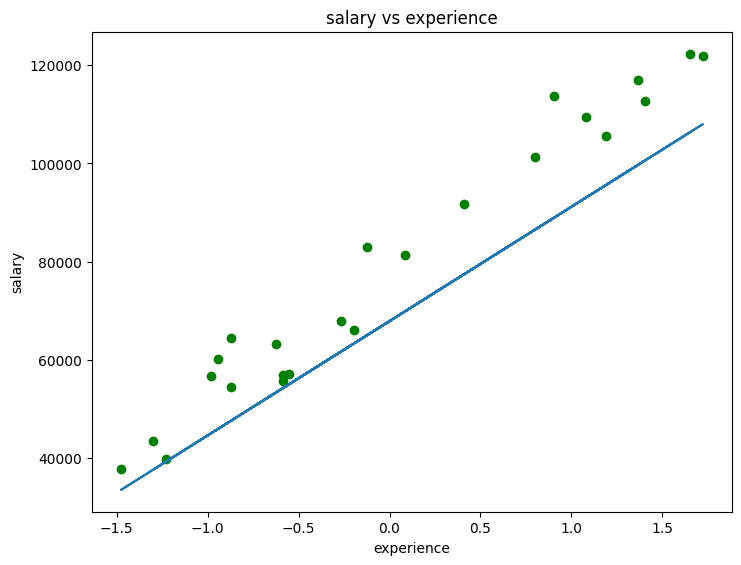

In [21]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xlabel('experience')
plt.ylabel('salary')
plt.title('salary vs experience')
ax.scatter(X_train_standardised, Y_train, color = 'g')
plt.plot(X_train_standardised, Y_train_prediction)
plt.show()